In [1]:
import numpy as np
import pandas as pd
import os
import shutil
from scipy import stats
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

In [12]:
# sub = "sdf"
# destination  = os.path.join(r"Z:\Projects\2023_Scholte_FMG1441\Data\"", sub, "Regression", sub + "_SC.png")
# destination
# # os.mkdir(destination)

'Z:\\Projects\\2023_Scholte_FMG1441\\Data\\"\\sdf\\Regression\\sdf_SC.png'

In [13]:
# for i in range(21, 36):
#     sub = "sub_" + str(i)
#     suffix = "_SC.png"
#     source_path = r"C:\Users\15202\OneDrive\C_\University of Amsterdam\Intern\CAVA_project"
#     source_path = os.path.join(source_path, sub + suffix)
#     destination = r"Z:\Projects\2023_Scholte_FMG1441\Data"
#     destination  = os.path.join(destination, sub, "Regression")
#     # os.mkdir(destination)
#     destination = os.path.join(destination, sub + suffix)
#     shutil.move(source_path, destination)

In [56]:
Data_path = r"Z:\Projects\2023_Scholte_FMG1441\Data"
epochs_timewindows = np.load(os.path.join(Data_path, "Epochs_Time_Window.npy"))
# Set the plot size
plt.rcParams['figure.figsize'] = [24, 16]
max_sub = 35    # Maximum number of participants
min_rep = 5     # Define minimum repetition
ce = []
sc = []
Rsq = []
ce_pvalue = []
sc_pvalue = []
ce_confidence_interval = []
sc_confidence_interval = []

In [60]:
plt.rcParams['figure.figsize'] = [24, 16]

In [57]:
for i in range(5, max_sub+1):
    sub_name = "sub_" + str(i)
    sub_data_path = os.path.join(Data_path, sub_name, "Regression")
    sta_data = np.load(os.path.join(sub_data_path, sub_name + "_βcoef(Oz).npy"))
    Rsq_data = np.load(os.path.join(sub_data_path, sub_name + "_Rsq(Oz).npy"))
    ce.append(list(sta_data[:, 0:min_rep].mean(axis = 1)))
    sc.append(list(sta_data[:, min_rep:].mean(axis = 1)))
    Rsq.append(list(Rsq_data))
    # print(i)
ce = np.array(ce)
# ce.shape
sc = np.array(sc)
# sc.shape
Rsq = np.array(Rsq)
# np.insert(Rsq, Rsq.shape[0], Rsq.mean(axis = 0), axis = 0)

In [58]:
for i in range(0, ce.shape[1]):
    ce_results = stats.ttest_1samp(ce[:, i], popmean = 0)
    ce_ci = ce_results.confidence_interval(confidence_level=0.95)
    ce_pvalue.append(ce_results.pvalue)
    ce_confidence_interval.append(list(ce_ci))
    sc_results = stats.ttest_1samp(sc[:, i], popmean = 0)
    sc_ci = sc_results.confidence_interval(confidence_level=0.95)
    sc_pvalue.append(sc_results.pvalue)
    sc_confidence_interval.append(list(sc_ci))
ce_pvalue = np.array(ce_pvalue)
sc_pvalue = np.array(sc_pvalue)
ce_confidence_interval = np.array(ce_confidence_interval)
sc_confidence_interval = np.array(sc_confidence_interval)
min_coef = np.min((np.min(ce_confidence_interval), np.min(sc_confidence_interval)))

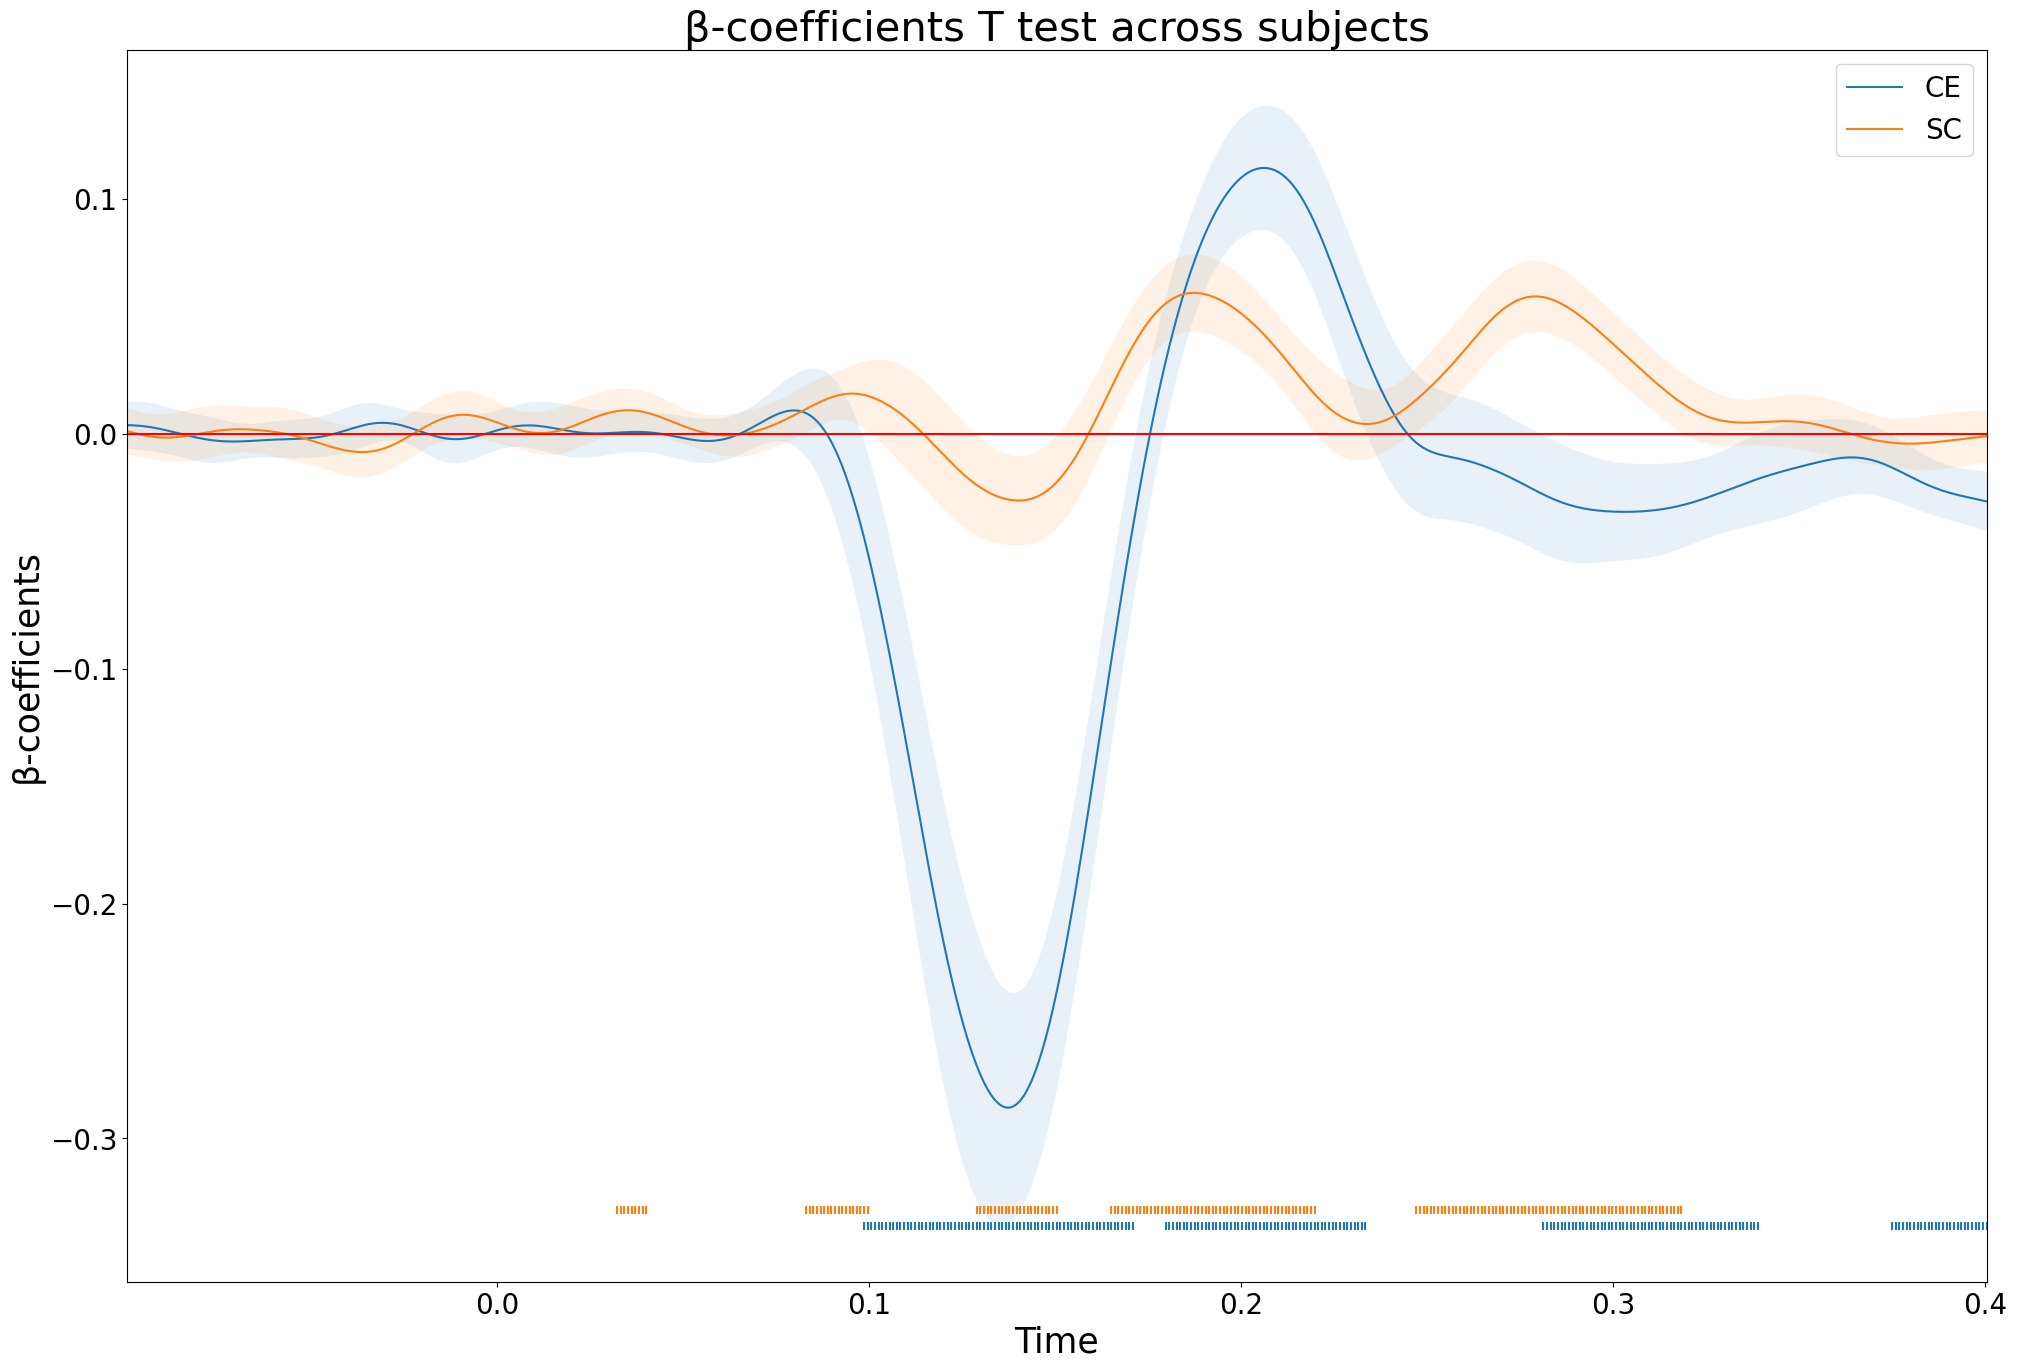

In [65]:
plt.figure(1).clear()
plt.figure(1)
plt.autoscale(axis = 'x', tight=True)
ce_plt, = plt.plot(epochs_timewindows, ce.mean(axis = 0), label = "CE")
plt.fill_between(epochs_timewindows, ce_confidence_interval[:, 0], ce_confidence_interval[:, 1], alpha = .1)
sc_plt, = plt.plot(epochs_timewindows, sc.mean(axis = 0), label = "SC")
plt.fill_between(epochs_timewindows, sc_confidence_interval[:, 0], sc_confidence_interval[:, 1], alpha = .1)
ce_p_index = np.where(ce_pvalue < 0.05)[0]
sc_p_index = np.where(sc_pvalue < 0.05)[0]
plt.scatter(epochs_timewindows[ce_p_index], [min_coef] * ce_p_index.shape[0], marker = "|", c = ce_plt.get_c())
plt.scatter(epochs_timewindows[sc_p_index], [min_coef*0.98] * sc_p_index.shape[0], marker = "|", c = sc_plt.get_c())
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Time', fontsize = 25)
plt.ylabel('β-coefficients', fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("β-coefficients T test across subjects", fontsize = 30)
plt.legend(fontsize="20")
plt.savefig(os.path.join(Data_path, "Coefficients_T-test.png"))

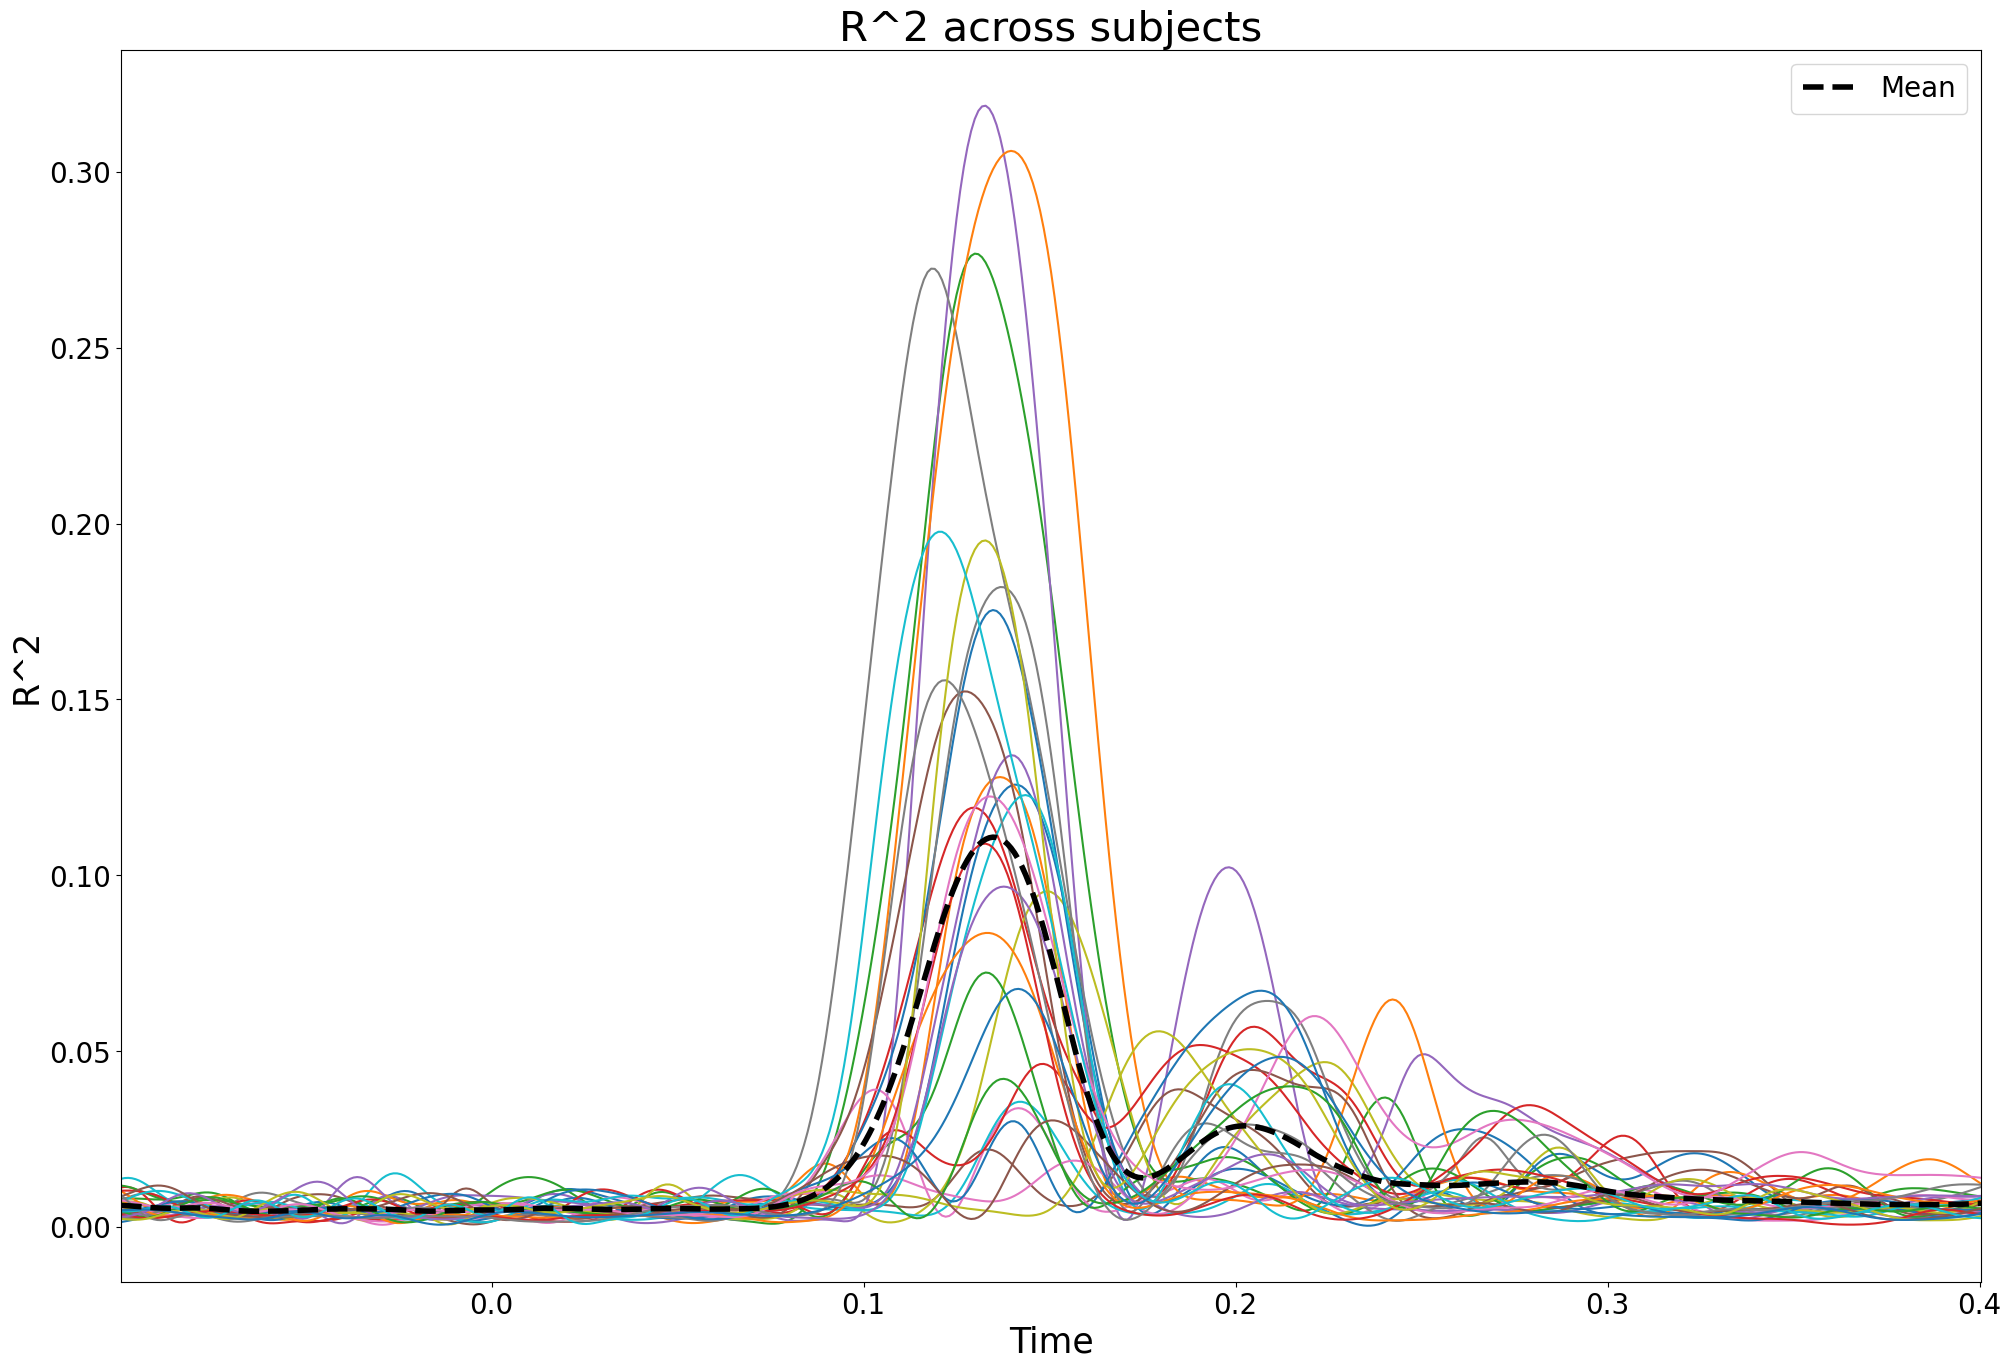

In [68]:
plt.figure(2).clear()
plt.figure(2)
plt.autoscale(axis = 'x', tight=True)
plt.plot(epochs_timewindows, Rsq.T)
plt.plot(epochs_timewindows, Rsq.mean(axis = 0), 'k--', linewidth = 4, label = 'Mean')
# plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Time', fontsize = 25)
plt.ylabel('R^2', fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("R^2 across subjects", fontsize = 30)
plt.legend(fontsize="20")
plt.savefig(os.path.join(Data_path, "R^2 across subjects.png"))